In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# from sklearn.kernel_ridge import KernelRidge
import seaborn as sns
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# customer churn dataset
df = pd.read_csv(r'C:\Users\vidha\Desktop\IISc\CP218 - Theory and applications of bayesian learning\Project2\Datasets\Iranian-Churn-Dataset-Data-Set\Customer Churn.csv')
print(df)

      Call Failure  Complains  Subscription Length  Charge Amount  \
0                8          0                   38              0   
1                0          0                   39              0   
2               10          0                   37              0   
3               10          0                   38              0   
4                3          0                   38              0   
...            ...        ...                  ...            ...   
3145            21          0                   19              2   
3146            17          0                   17              1   
3147            13          0                   18              4   
3148             7          0                   11              2   
3149             8          1                   11              2   

      Seconds of Use  Frequency of use  Frequency of SMS  \
0               4370                71                 5   
1                318                 5             

In [3]:
# customer churn datset
df.corr()['Customer Value']

Call Failure               0.121225
Complains                 -0.132895
Subscription Length        0.109565
Charge Amount              0.169428
Seconds of Use             0.415087
Frequency of use           0.401572
Frequency of SMS           0.924877
Distinct Called Numbers    0.284807
Age Group                 -0.183481
Tariff Plan                0.252298
Status                    -0.412990
Age                       -0.220362
Customer Value             1.000000
Churn                     -0.289144
Name: Customer Value, dtype: float64

In [4]:
# customer churn dataset
df_selected = df[['Call Failure', 'Subscription Length', 'Charge Amount', 'Seconds of Use', 'Frequency of use', 'Frequency of SMS', 'Distinct Called Numbers', 'Customer Value']]
# df_selected = df[['Call Failure', 'Complains', 'Subscription Length', 'Charge Amount',
#                   'Seconds of Use', 'Frequency of use', 'Frequency of SMS',
#                   'Distinct Called Numbers', 'Age Group', 'Tariff Plan', 'Status', 'Age',
#                   'Customer Value']]

In [5]:
df_selected.head()

,Call Failure,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Customer Value
0,8,38,0,4370,71,5,17,197.640
1,0,39,0,318,5,7,4,46.035
2,10,37,0,2453,60,359,24,1536.520
3,10,38,0,4198,66,1,35,240.020
4,3,38,0,2393,58,2,33,145.805


In [6]:
print("correlation of features with output :")
print(df_selected.corr()['Customer Value'])
columns = list(df_selected.columns)
corr_list = list(abs(df_selected.corr()['Customer Value']))[0:-1]
array_selected = df_selected.values
input_idx = [i for i in range(len(columns) - 1)]
output_idx = [input_idx[-1] + 1]

correlation of features with output :
Call Failure               0.121225
Subscription Length        0.109565
Charge Amount              0.169428
Seconds of Use             0.415087
Frequency of use           0.401572
Frequency of SMS           0.924877
Distinct Called Numbers    0.284807
Customer Value             1.000000
Name: Customer Value, dtype: float64


In [7]:
X = array_selected[:,input_idx]
y = array_selected[:,output_idx].astype('int')

In [8]:
def choose_features(num_of_features_choosen):
    temp1 = list(np.argsort(corr_list)[::-1][:num_best_features])
    temp2 = [input_idx[val] for val in temp1]
    choosen_features = [columns[val] for val in temp2]
    return choosen_features

In [9]:
# MAX_DEGREE = 7
# num_best_features_list = [i for i in range(1,len(columns))]
# n_list = [i for i in range(1,MAX_DEGREE + 1)] # degree list
# for num_best_features in num_best_features_list:
#     choosen_features = choose_features(num_best_features)
#     print("\nchoosen features :\n",choosen_features)
#     input_features = np.array(df_selected[choosen_features]).reshape(-1,len(choosen_features))
#     output_features = np.array(df_selected[['Customer Value']]).reshape(-1,1)

#     X_train, X_test, y_train, y_test = train_test_split(input_features, output_features, test_size = 0.25)

#     scaler = MinMaxScaler()
#     # transform data
#     X_train_scaled = scaler.fit_transform(X_train)
#     X_test_scaled = scaler.fit_transform(X_test)
#     y_train_scaled = scaler.fit_transform(y_train)
#     y_test_scaled = scaler.fit_transform(y_test)
#     for n in n_list:
#         # frequentist regression
#         poly = PolynomialFeatures(degree = n, interaction_only=False, include_bias=False)
#         X_train_scaled_poly = poly.fit_transform(X_train_scaled)
#         X_test_scaled_poly = poly.fit_transform(X_test_scaled)
        
#         linearRegrPoly = LinearRegression()
#         linearRegrPoly.fit(X_train_scaled_poly, y_train_scaled.flatten())
        
# #         print(f"coeff for degree = {n} is {linearRegrPoly.coef_}")
# #         print(f"intercept for degree = {n} is {linearRegrPoly.intercept_}")
        
#         score = linearRegrPoly.score(X_test_scaled_poly, y_test_scaled.flatten())
#         print(f"R2 score with degree = {n} is {score}")

#         y_pred = linearRegrPoly.predict(X_test_scaled_poly).reshape(-1,1)
#         scaled_rmse = np.sqrt(mean_squared_error(y_test_scaled,y_pred))
#         print(f"scaled rmse with degree {n} is : {scaled_rmse}")

#         y_pred = scaler.inverse_transform(y_pred)
#         actual_rmse = np.sqrt(mean_squared_error(y_test,y_pred))
#         print(f"scaled rmse with degree {n} is : {actual_rmse}")

using pca

In [14]:
n = 1
num_best_features = 7
choosen_features = choose_features(num_best_features)
print("\nchoosen features :\n",choosen_features)
input_features = np.array(df_selected[choosen_features]).reshape(-1,len(choosen_features))
output_features = np.array(df_selected[['Customer Value']]).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(input_features, output_features, test_size = 0.25)

scaler = MinMaxScaler()
# transform data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
y_train_scaled = scaler.fit_transform(y_train)
y_test_scaled = scaler.fit_transform(y_test)


choosen features :
 ['Frequency of SMS', 'Seconds of Use', 'Frequency of use', 'Distinct Called Numbers', 'Charge Amount', 'Call Failure', 'Subscription Length']


[0.51, 0.16, 0.14, 0.1, 0.04, 0.04, 0.01]


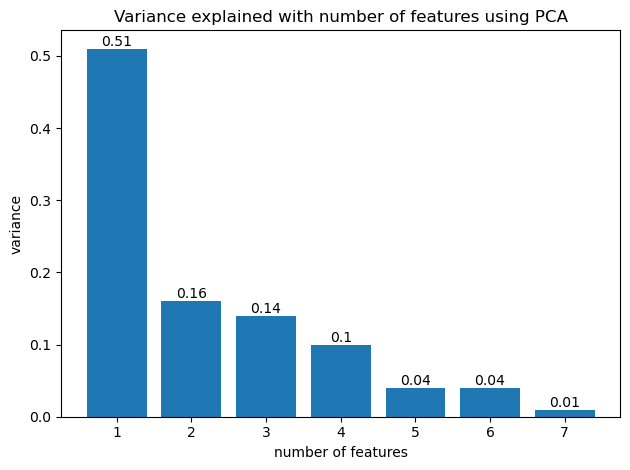

In [15]:
pca = PCA()
X_train_scaled = pca.fit_transform(X_train_scaled)
X_test_scaled = pca.transform(X_test_scaled)

explained_variance = pca.explained_variance_ratio_
explained_variance=[round(elem,2) for elem in explained_variance]
print(explained_variance)
x_bar = [i for i in range(1,len(explained_variance)+1)]
fig = plt.bar(x =x_bar, height=explained_variance)
plt.bar_label(labels=explained_variance,container=fig)

plt.title('Variance explained with number of features using PCA')
plt.xlabel("number of features")
plt.ylabel("variance")
plt.tight_layout()
plt.savefig("plots/variance_explained_pca_regression.jpg",dpi=150)

In [16]:
# pca = PCA(n_components=7)
# X_train_scaled = pca.fit_transform(X_train_scaled)
# X_test_scaled = pca.transform(X_test_scaled)

R2 score with degree = 1 is 0.96472832131099
scaled rmse with degree 1 is : 0.04626879707524713
scaled rmse with degree 1 is : 98.31379077736811
R2 score with degree = 2 is 0.9766855438131529
scaled rmse with degree 2 is : 0.03761731456248566
scaled rmse with degree 2 is : 79.93077467495205
R2 score with degree = 3 is 0.98723945515121
scaled rmse with degree 3 is : 0.027829778703157775
scaled rmse with degree 3 is : 59.13382697961777
R2 score with degree = 4 is 0.9872677268437977
scaled rmse with degree 4 is : 0.02779893240160997
scaled rmse with degree 4 is : 59.06828352423693
R2 score with degree = 5 is 0.9690252807886309
scaled rmse with degree 5 is : 0.04335895761618676
scaled rmse with degree 5 is : 92.1308475011783


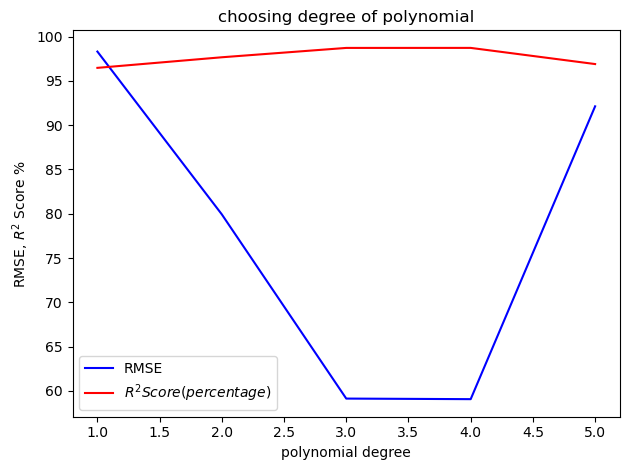

In [17]:
MAX_DEGREE = 5
n_list = [i for i in range(1,MAX_DEGREE + 1)] # degree list
rmse_actual = []
r2_score_percent = []
for n in n_list:
    # frequentist regression
    poly = PolynomialFeatures(degree = n, interaction_only=False, include_bias=False)
    X_train_scaled_poly = poly.fit_transform(X_train_scaled)
    X_test_scaled_poly = poly.fit_transform(X_test_scaled)

    linearRegrPoly = LinearRegression()
    linearRegrPoly.fit(X_train_scaled_poly, y_train_scaled.flatten())
#     print(linearRegrPoly.coef_)

    score = linearRegrPoly.score(X_test_scaled_poly, y_test_scaled.flatten())
    print(f"R2 score with degree = {n} is {score}")
    r2_score_percent.append(100*score)
    
    y_pred = linearRegrPoly.predict(X_test_scaled_poly).reshape(-1,1)
    scaled_rmse = np.sqrt(mean_squared_error(y_test_scaled,y_pred))
    print(f"scaled rmse with degree {n} is : {scaled_rmse}")

    y_pred = scaler.inverse_transform(y_pred)
    actual_rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    print(f"scaled rmse with degree {n} is : {actual_rmse}")
    rmse_actual.append(actual_rmse)

x = [i for i in range(1,len(rmse_actual)+1)]
plt.plot(x,rmse_actual,'b-')
plt.plot(x,r2_score_percent,'r-')
plt.xlabel("polynomial degree")
plt.ylabel(r"RMSE, $R^2$ Score % ")

plt.title('choosing degree of polynomial')
plt.legend(['RMSE',r'$R^2 Score (percentage)$'])
plt.tight_layout()
plt.savefig("plots/polynomial_degree_pca_regression.jpg",dpi=150)

plt.show()

Bayesian Ridge

R2 score with degree = 1 is 0.9647296287281546
scaled rmse with degree 1 is : 0.04626793954333607
scaled rmse with degree 1 is : 98.31196865926222
R2 score with degree = 2 is 0.9769451101791803
scaled rmse with degree 2 is : 0.03740732641669714
scaled rmse with degree 2 is : 79.48458346325476
R2 score with degree = 3 is 0.9872240312835648
scaled rmse with degree 3 is : 0.027846592765512546
scaled rmse with degree 3 is : 59.16955417187169
R2 score with degree = 4 is 0.9868583839951779
scaled rmse with degree 4 is : 0.028242265428169794
scaled rmse with degree 4 is : 60.01029527239232
R2 score with degree = 5 is 0.9882753688016385
scaled rmse with degree 5 is : 0.026676247564896345
scaled rmse with degree 5 is : 56.682757875794344


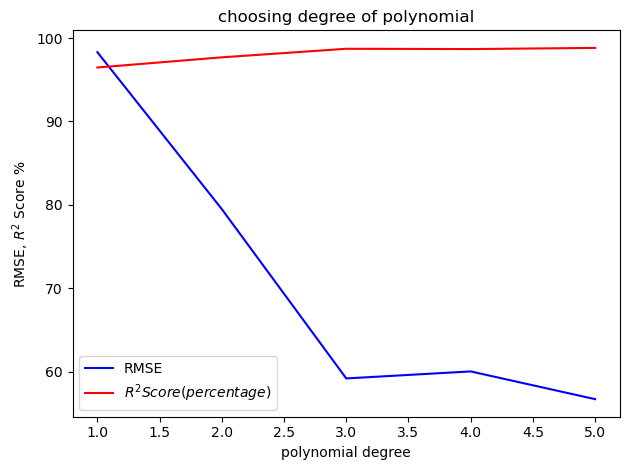

In [18]:
MAX_DEGREE = 5
n_list = [i for i in range(1,MAX_DEGREE + 1)] # degree list
rmse_actual = []
r2_score_percent = []
for n in n_list:
    # bayesian ridge regression
    poly = PolynomialFeatures(degree = n, interaction_only=False, include_bias=False)
    X_train_scaled_poly = poly.fit_transform(X_train_scaled)
    X_test_scaled_poly = poly.fit_transform(X_test_scaled)

    clf = linear_model.BayesianRidge()
    clf.fit(X_train_scaled_poly, y_train_scaled.flatten())
#     print(clf.coef_)

    score = clf.score(X_test_scaled_poly, y_test_scaled.flatten())
    print(f"R2 score with degree = {n} is {score}")
    r2_score_percent.append(100*score)
    
    y_pred = clf.predict(X_test_scaled_poly).reshape(-1,1)
    scaled_rmse = np.sqrt(mean_squared_error(y_test_scaled,y_pred))
    print(f"scaled rmse with degree {n} is : {scaled_rmse}")

    y_pred = scaler.inverse_transform(y_pred)
    actual_rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    print(f"scaled rmse with degree {n} is : {actual_rmse}")
    rmse_actual.append(actual_rmse)

x = [i for i in range(1,len(rmse_actual)+1)]
plt.plot(x,rmse_actual,'b-')
plt.plot(x,r2_score_percent,'r-')
plt.xlabel("polynomial degree")
plt.ylabel(r"RMSE, $R^2$ Score % ")

plt.title('choosing degree of polynomial')
plt.legend(['RMSE',r'$R^2 Score (percentage)$'])
plt.tight_layout()
plt.savefig("plots/polynomial_degree_pca_bayesain_ridge_regression.jpg",dpi=150)

plt.show()